## Necessary Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# Reading the file using Pandas
df = pd.read_csv("musk_csv.csv")

In [34]:
# Checking the head
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


So, We can see that first three columns are little to no use for our task, and should eventually be dropped before training

Some more data analysis using some pre-built functions

In [35]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


Extracting the Independent and Dependent variables form our Dataframe

In [6]:
# creating input features and target variables
X= df.iloc[:,3:169]
y= df.iloc[:,169]

There is lot of variation in those 16 different columns strating from f1 all the way f166, 

So these values should be standardized, and we do this by using Sklearn in built Standard Scaler

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.24312408,  0.12255207,  0.19347093, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-0.33702966, -0.7584422 , -1.05742889, ..., -0.24537589,
         0.18759789,  0.39560282],
       [-0.24312408, -0.82451677, -1.05742889, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [-0.28068632,  0.18862664,  0.79684613, ..., -0.33617735,
         0.08235309, -0.50760562],
       [-0.1492185 , -0.0206095 ,  0.73798026, ...,  0.06334909,
         0.45070987,  0.79939012],
       [-0.1492185 , -0.03162193,  0.73798026, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

In [8]:
# Splitting the data into training and validation set in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Architecture of Model
We are gonna create a Simple ANN for this problem

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=166))
#Second  Hidden Layer
classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [87]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                10688     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 44,481
Trainable params: 44,481
Non-trainable params: 0
_________________________________________________________________


Total number of trainable parameters in our model is around 45k, which will be pretty easy to train even on a system without GPU, i.e. CPU can handle it pretty easily

In [88]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32,
                        epochs=10, validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 208us/step - loss: 0.2071 - acc: 0.9193 - val_loss: 0.1292 - val_acc: 0.9470
Epoch 2/10
5278/5278 [==============================] - 1s 120us/step - loss: 0.0895 - acc: 0.9665 - val_loss: 0.0765 - val_acc: 0.9697
Epoch 3/10
5278/5278 [==============================] - 1s 113us/step - loss: 0.0567 - acc: 0.9780 - val_loss: 0.0663 - val_acc: 0.9712
Epoch 4/10
5278/5278 [==============================] - 1s 115us/step - loss: 0.0391 - acc: 0.9839 - val_loss: 0.0480 - val_acc: 0.9742
Epoch 5/10
5278/5278 [==============================] - 1s 112us/step - loss: 0.0264 - acc: 0.9890 - val_loss: 0.0316 - val_acc: 0.9879
Epoch 6/10
5278/5278 [==============================] - 1s 114us/step - loss: 0.0196 - acc: 0.9922 - val_loss: 0.0354 - val_acc: 0.9833
Epoch 7/10
5278/5278 [==============================] - 1s 113us/step - loss: 0.0170 - acc: 0.9932 - val_loss: 0.0339 - val_acc: 0.9864


Accuracy = 99.87% 
and 
Validation Accuracy = 98.86 %

It is very good for a model with this simple architecture.

A high validation accuracy indicates that our model has generalized pretty well

In [89]:
eval_model=classifier.evaluate(X_train, y_train)
# Loss and Accuracy of Model
eval_model

5278/5278 [==============================] - 0s 41us/step


[0.018655693048409895, 0.9929897688518378]

Loss : 1% thats reasonable, Accuracy:99% Thats awesome

Now, its time to predict values and convert them in the form of 0's and 1's as right now they will be in the form of probabilities

In [0]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [91]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1104    0]
 [  15  201]]


Out of 1320 samples, only 15 samples were labelled incorrect, This is a very fair and Robust model

In [92]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


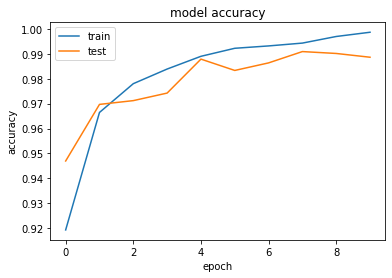

In [93]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

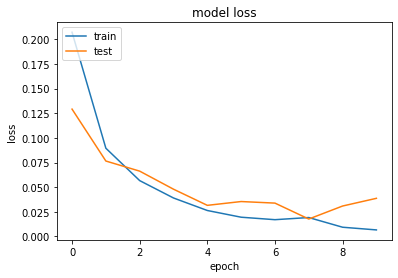

In [94]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
classifier.save("classifier.h5")

### Loading the model

In [2]:
from keras.models import load_model

In [3]:
model = load_model("classifier.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1116
           1       0.99      0.97      0.98       204

    accuracy                           0.99      1320
   macro avg       0.99      0.98      0.99      1320
weighted avg       0.99      0.99      0.99      1320



High Precision and Recall and Near Perfect f1-score, Looks like our model has done a superb Job